# Import Libraries

In [9]:
# Importr linraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Import Training Dataset 

In [10]:
# Import MNIST Dataset 
data=pd.read_csv(r"C:\Users\ASUS\Downloads\mnist_train.csv\mnist_train.csv")
data.head(1)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,...,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Import Testing Dataset

In [11]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\mnist_test.csv\mnist_test.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,...,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,254,207,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting teh testing dataset into x_train,y_train

In [12]:
x_test=df.drop(columns=["label"],axis=1)
y_test=df["label"]

# Splilliting the training dataset intp=o x_train,y_train

In [13]:
# Split the data into input and output columns 
x_train=data.drop(columns=["label"],axis=1)

In [14]:
y_train=data["label"]

# Now chaeck what is the value of component gives the best score 

In [52]:
# Now apply PCA and then check what is the time taken by this model 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import time 
start=time.time()
ss=StandardScaler()
x_train_new=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns)
x_test_new=pd.DataFrame(ss.transform(x_test),columns=x_test.columns)
lr=LogisticRegression()
pca_train_score=[]
pca_test_score=[]
epochs=[]
for i in range(1,786,50):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_new)
    x_test_pca=pca.transform(x_test_new)
    lr.fit(x_train_pca,y_train)
    train_score=lr.score(x_train_pca,y_train)
    test_score=lr.score(x_test_pca,y_test)
    # print(i,train_score,test_score)
    pca_train_score.append(train_score)
    pca_test_score.append(test_score)
    epochs.append(i)
        

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-

In [19]:
epochs

In [18]:
pca_train_score

In [17]:
pca_test_score

Text(0, 0.5, 'accuracy')

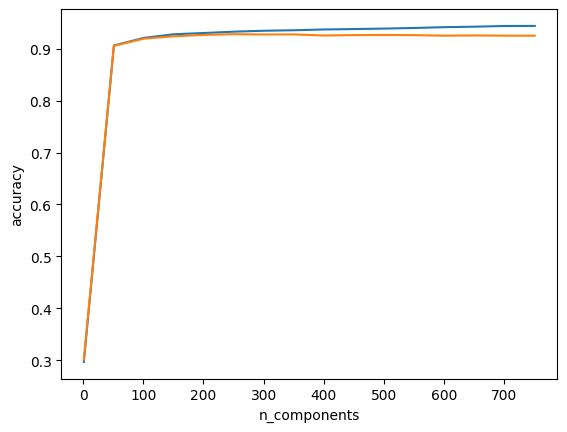

In [22]:
# Now make the line plot to see the variation of train score vs epochs
plt.plot(epochs,pca_train_score)
plt.plot(epochs,pca_test_score)
plt.xlabel("n_components")
plt.ylabel("accuracy")

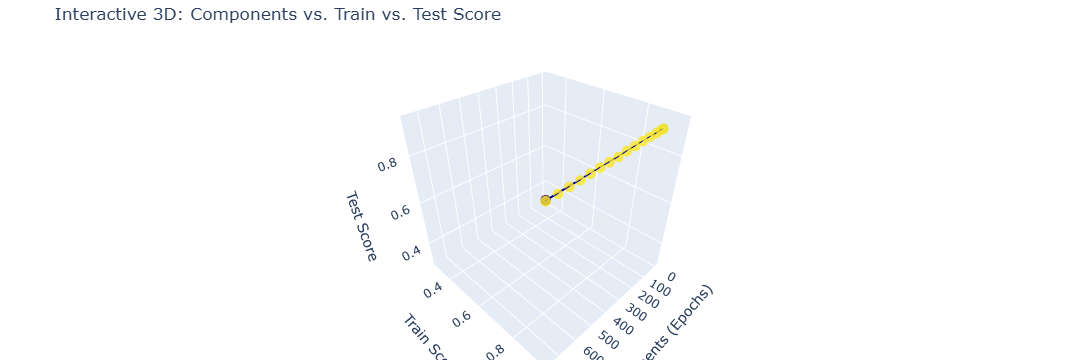

In [61]:
import plotly.graph_objects as go

# 1. Create the 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=epochs,
    y=pca_train_score,
    z=pca_test_score,
    mode='markers+lines',
    marker=dict(
        size=6,
        color=pca_test_score,    # Color based on test accuracy
        colorscale='Viridis',   # Aesthetic color theme
        opacity=0.8
    ),
    line=dict(
        color='darkblue',
        width=2
    )
)])

# 2. Add Labels
fig.update_layout(
    title='Interactive 3D: Components vs. Train vs. Test Score',
    scene = dict(
        xaxis_title='Components (Epochs)',
        yaxis_title='Train Score',
        zaxis_title='Test Score'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# 3. Render
fig.show()

In [75]:
# Now i also want to saw you the time taken by each of them 
import time
start=time.time()
Time_consumed=[]
for i in epochs:
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_new)
    x_test_pca=pca.transform(x_test_new)
    lr.fit(x_train_pca,y_train)
    train_score=lr.score(x_train_pca,y_train)
    test_score=lr.score(x_test_pca,y_test)
    j=time.time()-start
    Time_consumed.append(j)
    start=time.time()
    
    


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

<Axes: >

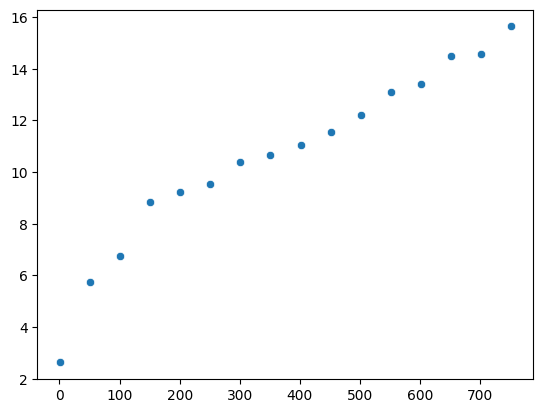

In [76]:
# Now make the line plot to see the variation of train score vs epochs
sns.scatterplot(x=epochs,y=Time_consumed)


In [16]:
# Time and accuracy when the number of component is 785
from sklearn.linear_model import LogisticRegression
import time 
start=time.time()
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(time.time()-start)
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)
print(train_score,test_score)



C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14.721365451812744
0.9339166666666666 0.9255


In [82]:
# After analyzing all of the things i found that 150 number of component is best  
pca=PCA(n_components=150)
x_train_pca=pca.fit_transform(x_train_new)
x_test_pca=pca.transform(x_test_new)
start=time.time()
lr.fit(x_train_pca,y_train)
train_score=lr.score(x_train_pca,y_train)
test_score=lr.score(x_test_pca,y_test)
time_taken=time.time()-start
print(time_taken)
print(train_score,test_score)


7.174606800079346
0.9273666666666667 0.9244


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Thanks 

# Here i know this loop methos is too slow for that you can also apply Grid Search CV to find the best value of Component.
# But here you fails to find the time taken by the each no. of component . 
# Now the selected n_component us 150 and the time taken by the model is 7.174606800079346 secs and the accuracy is 0.9273666666666667 0.9244